In [2]:
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('satis.csv')

In [4]:
df.head()

,id,tarih,urun,miktar,fiyat
0,1,2025-01-05,Kalem,10,2.5
1,2,2025-01-07,Defter,5,7.0
2,3,2025-01-10,Silgi,20,1.5
3,4,2025-01-12,Kalem,15,2.5
4,5,2025-01-15,Defter,8,7.0


In [5]:
df['gelir'] = df['miktar'] * df['fiyat']

In [6]:
df.head()

,id,tarih,urun,miktar,fiyat,gelir
0,1,2025-01-05,Kalem,10,2.5,25.0
1,2,2025-01-07,Defter,5,7.0,35.0
2,3,2025-01-10,Silgi,20,1.5,30.0
3,4,2025-01-12,Kalem,15,2.5,37.5
4,5,2025-01-15,Defter,8,7.0,56.0


In [7]:
toplam_gelir_urun = df.groupby('urun')['gelir'].sum()

In [8]:
en_cok_satilan_urun = toplam_gelir_urun.idxmax()

In [9]:
# Görselleştirme

#tarihe cevirme

df['tarih'] = pd.to_datetime(df['tarih'])

#aya cevirme

df['ay'] = df['tarih'].dt.to_period('M')  # YYYY-MM formatı

#aylik gelir

aylik_gelir = df.groupby('ay')['gelir'].sum()

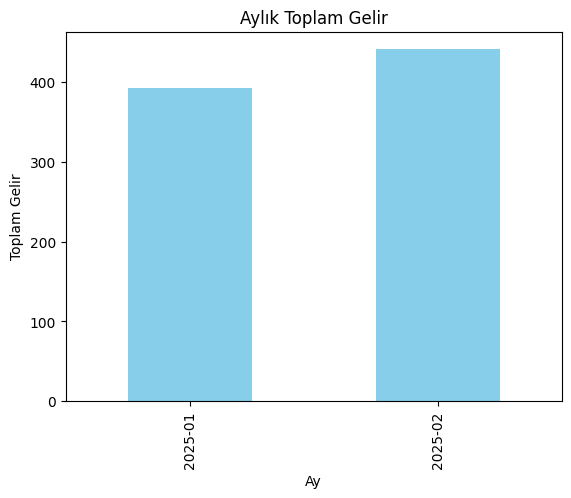

In [10]:
aylik_gelir.plot(kind='bar', color='skyblue', title='Aylık Toplam Gelir')
plt.xlabel('Ay')
plt.ylabel('Toplam Gelir')
plt.show()


In [11]:
# Ay sütunu zaten var varsayalım
# Pivot table: index=ay, columns=urun, values=gelir
aylik_urun_gelir = df.pivot_table(index='ay', columns='urun', values='gelir', aggfunc='sum')

print(aylik_urun_gelir)


urun     Cetvel  Defter  Kalem  Silgi
ay                                   
2025-01    51.0   161.0  112.5   67.5
2025-02    48.0   238.0   95.0   60.0


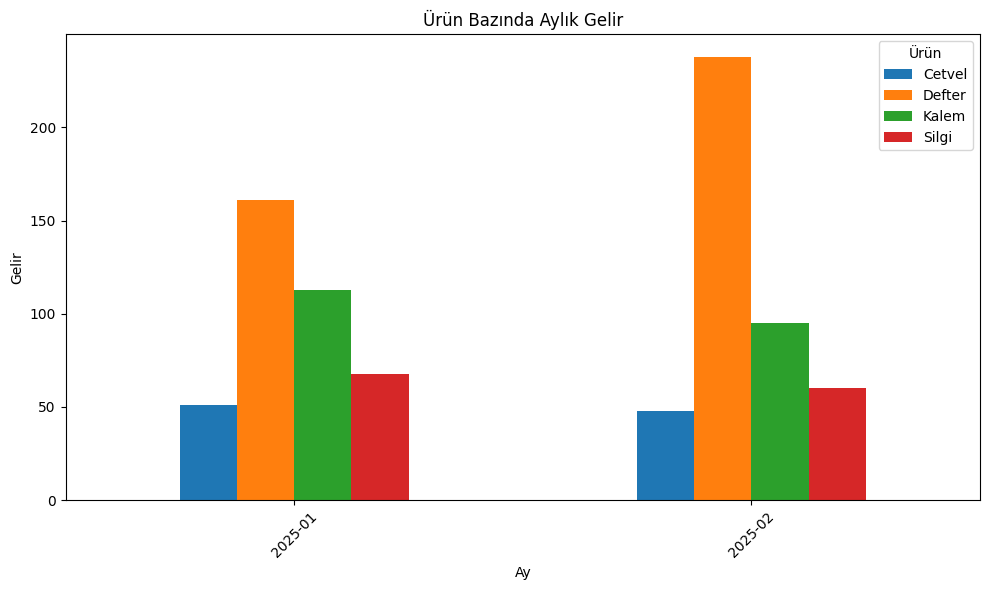

In [12]:
aylik_urun_gelir.plot(kind='bar', figsize=(10,6))
plt.title('Ürün Bazında Aylık Gelir')
plt.xlabel('Ay')
plt.ylabel('Gelir')
plt.xticks(rotation=45)
plt.legend(title='Ürün')
plt.tight_layout()
plt.show()


In [13]:
#urune vergi ekle = vergi columnu olustur

df['vergi'] = df['gelir']*0.10

df

,id,tarih,urun,miktar,fiyat,gelir,ay,vergi
0,1,2025-01-05,Kalem,10,2.5,25.0,2025-01,2.50
1,2,2025-01-07,Defter,5,7.0,35.0,2025-01,3.50
2,3,2025-01-10,Silgi,20,1.5,30.0,2025-01,3.00
3,4,2025-01-12,Kalem,15,2.5,37.5,2025-01,3.75
4,5,2025-01-15,Defter,8,7.0,56.0,2025-01,5.60
5,6,2025-01-18,Cetvel,12,3.0,36.0,2025-01,3.60
6,7,2025-01-20,Silgi,25,1.5,37.5,2025-01,3.75
7,8,2025-01-22,Kalem,20,2.5,50.0,2025-01,5.00
8,9,2025-01-25,Defter,10,7.0,70.0,2025-01,7.00
9,10,2025-01-27,Cetvel,5,3.0,15.0,2025-01,1.50


In [15]:
#Top 2 ürün (pivot table): gelire göre en çok kazandıran 2 ürünü bul

pivot = df.groupby('urun')['gelir'].sum().sort_values(ascending=False).head(2)

pivot


urun
Defter    399.0
Kalem     207.5
Name: gelir, dtype: float64

In [18]:
# Pivot tablo → ürüne ve aya göre toplam geliri göster, index= row, column = column, values = values

tablo = df.pivot_table(values='gelir', index='urun', columns='ay', aggfunc='sum')

tablo

ay,2025-01,2025-02
urun,,
Cetvel,51.0,48.0
Defter,161.0,238.0
Kalem,112.5,95.0
Silgi,67.5,60.0


Bugün yeni sütun eklemeyi, sıralama ile en çok kazandıran ürünleri bulmayı ve pivot tablo yapmayı öğrendim.